# Split a Table into Groups

The _groupby_ function is one of the most powerful and useful functions for dataframes in Pandas. The main idea is to:
- **split** a large dataframe table into groups based on some values or categories in some of the columns, and then 
- **apply** some aggregation or other function on each group, and then 
- **combine** them back together into a single table. 

In [6]:
import pandas as pd

## Loading data

We will now start with another data from API from an open source [brewery-DB API](https://www.openbrewerydb.org/)

In [7]:
url = 'https://api.openbrewerydb.org/breweries?per_page=50'

import requests
response = requests.get(url)
response

<Response [200]>

In [8]:
df = (
    pd
    .json_normalize(response.json())
)

df.head(5)

,id,name,brewery_type,street,address_2,address_3,city,state,county_province,postal_code,country,longitude,latitude,phone,website_url,updated_at,created_at
0,2,Avondale Brewing Co,micro,201 41st St S,None,None,Birmingham,Alabama,None,35222-1932,United States,-86.774322,33.524521,2057775456,http://www.avondalebrewing.com,2018-08-23T23:19:57.825Z,2018-07-24T01:32:47.255Z
1,44,Trim Tab Brewing,micro,2721 5th Ave S,None,None,Birmingham,Alabama,None,35233-3401,United States,-86.7914000624146,33.5128492349817,2057030536,http://www.trimtabbrewing.com,2018-08-23T23:20:31.423Z,2018-07-24T01:32:47.815Z
2,46,Yellowhammer Brewery,micro,2600 Clinton Ave W,None,None,Huntsville,Alabama,None,35805-3046,United States,-86.5932014,34.7277523,2569755950,http://www.yellowhammerbrewery.com,2018-08-23T23:20:33.102Z,2018-07-24T01:32:47.838Z
3,55,Bearpaw River Brewing Co,micro,4605 E Palmer Wasilla Hwy,None,None,Wasilla,Alaska,None,99654-7679,United States,-149.4127103,61.5752695,,http://bearpawriverbrewing.com,2018-08-23T23:20:40.743Z,2018-07-24T01:32:47.967Z
4,76,King Street Brewing Co,micro,9050 King Street,None,None,Anchorage,Alaska,None,99515,United States,-149.879076042937,61.1384893547315,9073365464,http://www.kingstreetbrewing.com,2018-08-23T23:20:57.179Z,2018-07-24T01:32:48.301Z


## Loading all pages

If the number of results from an API is high, the API is often using pagination and returning a constant number of results in each page. We set up the page size to be 50 in the URL above, and now we will load 20 pages from the API

In [13]:
response = requests.get(url).json()
api_dataset = response

#looping through and putting data to the list api_dataset
for page in range (2, 20):
    response = requests.get(url + f"&page={page}").json()
    api_dataset.extend(response)

pmap_data = pd.json_normalize(api_dataset)

### Saving the dataset

We can save the dataset for later usage. We can save it in Excel format or CSV.

In [14]:
pmap_data.to_csv('../data/us_breweries.csv', index=False)

## Counting Values

The simplest aggregation function for each group is the _size_. How many breweries do we have in each state?

In [44]:
(
    pmap_data
    .groupby('state')
    .size()
)

state
Alabama                  48
Alaska                   45
Arizona                 120
Arkansas                 17
California              109
Colorado                 34
Connecticut               9
Delaware                  2
District of Columbia      2
Florida                  24
Georgia                  10
Hawaii                    2
Idaho                     6
Illinois                 21
Indiana                  16
Iowa                      8
Kansas                    5
Kentucky                  5
Louisiana                 4
Maine                     8
Maryland                 10
Massachusetts            13
Michigan                 42
Minnesota                15
Mississippi               2
Missouri                 10
Montana                   6
Nebraska                 10
Nevada                    5
New Hampshire             5
New Jersey                9
New Mexico                7
New York                 34
North Carolina           26
North Dakota              2
Ohio          

## Sorting Values

To sort the values is also simple with _sort_value()_ function

In [43]:
us_brewery_distribution = (
    pmap_data
    .groupby('state')
    .size()
    .sort_values(ascending=False)
)

us_brewery_distribution

state
Arizona                 120
California              109
Alabama                  48
Alaska                   45
Michigan                 42
New York                 34
Colorado                 34
Washington               32
Pennsylvania             31
Ohio                     30
Oregon                   29
Texas                    27
North Carolina           26
Florida                  24
Illinois                 21
Virginia                 20
Wisconsin                17
Arkansas                 17
Indiana                  16
Minnesota                15
Massachusetts            13
Tennessee                12
Georgia                  10
Maryland                 10
Missouri                 10
Nebraska                 10
Connecticut               9
New Jersey                9
Iowa                      8
Maine                     8
New Mexico                7
Montana                   6
South Carolina            6
Idaho                     6
Kansas                    5
New Hampshire 

## Visualization of the data

Let's do a simple visualization of the data without any map, just using the longitude and latitude values of each brewery. We will first convert the longitude and latitude to be numeric values for the plot.

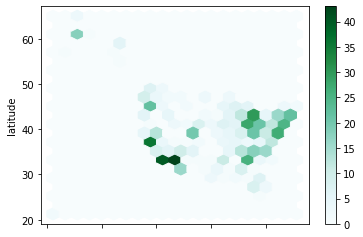

In [41]:
(
    pmap_data
    .assign(longitude = lambda x : pd.to_numeric(x.longitude))
    .assign(latitude = lambda x : pd.to_numeric(x.latitude))
    .plot
    .hexbin(x='longitude', y='latitude', gridsize=20)
);

## More advanced Aggregation Functions

Our data set doesn't have many numeric field, and we should load a different data set to examine the more advanced aggregation options of _groupby_. We will use one of the famouse data sets used for learning to build machine learning models. The last column _annual_income_ has only two values _<=50K_ and _>50K_, and we want to try and predict based on the other parameters such as age, gender, years of education, etc. in which bucket each person lands. 

In [2]:
adult_names = ['age','workclass','id','education','education_num','marital_status',
                'occupation', 'relationship','race','gender','capital_gain',
              'capital_loss','hours_per_week','native_country','annual_income']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                names = adult_names)
df

,age,workclass,id,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Calclulating mean

First we can calculate the average age in each income group, and see if there is any difference.

In [4]:
(
    df
    .groupby('annual_income')['age']
    .mean()
)

annual_income
 <=50K    36.783738
 >50K     44.249841
Name: age, dtype: float64

We can see that the average age of people who earned more than 50K is over 44, while the average age of the lower income (less than 50K) is younger and around 36 years

## Group by multiple keys

Let's see if women earn less than men, and we will do that by grouping both by the income group (_annual_income_) and the gender column.

In [5]:
(
    df
    .groupby(['annual_income','gender'])
    .size()
)

annual_income  gender 
 <=50K          Female     9592
                Male      15128
 >50K           Female     1179
                Male       6662
dtype: int64

It is hard to calculate the percentage and evaluate the difference from the size of each group. Let's calculate the percentage and also format the out to make it easier to read the results

In [3]:
(
    df
    .groupby(['annual_income','gender'])[['id']]
    .count()
    .groupby(level=0)
    .apply(lambda x: x / float(x.sum()))
    .style
    .format('{:.2%}')
)



We can now easily see that the percentage of women with higher income is less than half that of the lower income. Hopefully, the current data (this data is extracted from the 1994 Census database) has improved the gender equlity in this aspect.

## Advanced Group Functions

We saw before how to apply a function on each row in a dataframe table, but many times we want to apply a function on a group of rows based on a value of a column or a couple of columns.

We can also take each of the groups and calculate more advanced functions such as Correlation. Let's see if we find Correlation with in each group between years of education and the number of work per week (which shows some quality of hard work)

In [7]:
(
    df
    .loc[:,['annual_income','gender','education_num','hours_per_week']]
    .groupby(['annual_income','gender'])
    .corr()
    .style
    .format('{:.3}')
    .background_gradient(cmap='coolwarm')
)

We can see that within each group the correlation of "hard work", as we defined it before, is higher for the female (0.151 and 0.187) than the male (0.069 and 0.0477). 